# Shooting Method for Solving a Boundary Value Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
def rk4(odefunc,y0,t0,tf,dt,r=[],backwards=False):
    tv, p = [t0], [np.array(y0,dtype=float)]
    y, t = y0, t0
    Nt = int(np.fabs(tf-t0)/dt)+1
    if backwards:
        dt = -1*dt
        
    tic = timeit.default_timer()

    for tstep in range(Nt):
        k1 = dt*odefunc(t, y, r)
        k2 = dt*odefunc(t+dt/2, y+k1/2, r)
        k3 = dt*odefunc(t+dt/2, y+k2/2, r)
        k4 = dt*odefunc(t+dt, y+k3, r)
        y += (k1 + 2*k2 + 2*k3 + k4)/6
                
        t += dt
        p.append(np.array(y,dtype=float)) # speed & storage test
        tv.append(t)

    toc = timeit.default_timer()
    #print('Run complete in {:4.2f} seconds.'.format(toc-tic))
    return tv, p

###### In this example we use the secant method to solve the BVP since Newton's method requires the derivative of the function. The shooting method can be implemented with Newton's method but the secant method is easier at the cost of a few iterations.

Suppose the BVP is
\begin{align}
y'' &= f(x,y,y')\\
y(a) &= A\\
y(b) &= B
\end{align}

* Set $g(c) = y(b;c)-B$ where $y$ is the (approximated) solution to the ODE
* The notation $y(b;c)$ means $y$ has $x=b$ as its final input but is parametrized by $c$, for example, $y(x;m) = m(x-x_0)+y_0$ has $x$ as an input variable but can be parametrized by the slope $m$ if we were considering different lines that pass through $(x_0,y_0)$
* We do not know $y(b;c)$, it is an array of values so we will use the final value of the array as the approximation of the solution
* We want to drive $g(c)$ towards 0 but we do not know the value of $c$ that yields this result
* We know the value of $b$ but the algorithm does not, we want the algorithm to start at the initial values, $y(a) = A$ and $y'(a) = c$, and "shoot" for the value $y(b)=B$
* The secant method is $$c_{n+1} = c_n - \frac{g(c_n)}{\frac{g(c_n)-g(c_{n-1})}{c_n-c_{n-1}}}$$ which can be re-written as $$c_{n+1} = c_n - g(c_n)\frac{c_n-c_{n-1}}{g(c_n)-g(c_{n-1})}$$

Rewrite the BVP as an IVP
\begin{align}
u' &= v\\
v' &= f(x,u,v)
\end{align}
with initial conditions
\begin{align}
u(a) &= A\\
v(a) &= u'(a) = c
\end{align}

###### Solve the nonlinear Boundary Value Problem (BVP)
\begin{align}
y'' &= -\frac{(y')^2}{y}\\
y(0) &= 1\\
y(1) &= 2
\end{align}

###### Transform the BVP into a first-order system IVP:

Let $v = y'$ and $u=y$ so $v' = y''$ and $u'=y'=v$, so we obtain the following system:
\begin{align}
u' &= v\\
v' &= -\frac{v^2}{u}
\end{align}
with initial conditions
\begin{align}
u(0) &= 1\\
v(0) &= u'(0) = v_0
\end{align}

Again, notice that the BVP was swapped for an IVP.

In [3]:
def Fode(x,y,r):
    # System of Equations
    u, v = y[0], y[1]
    return np.array([v,-v**2/u])

BC is 2.0000 in 7 iterations.


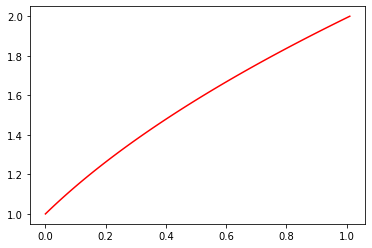

In [4]:
# Initial guesses for the derivative condition of the IVP
c1, c2 = 0.1, 3
# The BCs for the problem are
lbc, rbc = 1, 2
# Independent variable interval
x0, xf, dx = 0, 1, 1e-2
# Algorithm parameters: iteration counter, max iterations, initial error, tolerance
its, MAXITS, err, tol = 1, 10, 1, 1e-6
# Initial condition array
y10 = [lbc,c1]
y20 = [lbc,c2]
# Prime the secant method
t1,y1 = rk4(Fode,y10,x0,xf,dx)
t2,y2 = rk4(Fode,y20,x0,xf,dx)
# Evalute the function
g1 = np.array(y1)[-1,0]-rbc
g2 = np.array(y2)[-1,0]-rbc
# Run the secant method
while err > tol and its <= MAXITS:
    # Store c_n to be c_{n-1} in the next iteration
    tmp = c2
    # Store c_{n+1} using the secant method by overwriting c_n
    c2 = c1 - g1*(c2-c1)/(g2-g1)
    # Swap in c_{n-1}
    c1 = tmp
    # Set new initial conditions
    y10 = [1,c1]
    y20 = [1,c2]
    # Solve the IVP
    t1,y1 = rk4(Fode,y10,x0,xf,dx)
    t2,y2 = rk4(Fode,y20,x0,xf,dx)
    # Compute the error using the Cauchy-criterion for convergence
    err = np.fabs(c1-c2)
    # Evalute the function
    g1 = np.array(y1)[-1,0]-rbc
    g2 = np.array(y2)[-1,0]-rbc
    its += 1
# Display the results    
print('BC is {:2.4f} in {:d} iterations.'.format(np.array(y2)[-1,0],its))
plt.plot(t2,np.array(y2)[:,0],'r');